<a href="https://colab.research.google.com/github/Alirez1043/DeepLearning/blob/main/Assighments/3/Learning_rate_finder_on_Hode(Using_Scheduler).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download Dataset**

In [1]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
!mkdir dataset
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

--2022-03-03 22:14:42--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 929 [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]     929  --.-KB/s    in 0s      

2022-03-03 22:14:43 (8.50 MB/s) - ‘dataset.py’ saved [929/929]

--2022-03-03 22:14:43--  https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset/Data_hoda_full.

Download Learning Rate Finder source file from github

In [2]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/tf2-tutorial/master/callbacks/learningratefinder.py 

--2022-03-03 22:14:44--  https://raw.githubusercontent.com/Alireza-Akhavan/tf2-tutorial/master/callbacks/learningratefinder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5439 (5.3K) [text/plain]
Saving to: ‘learningratefinder.py’

learningratefinder. 100%[===================>]   5.31K  --.-KB/s    in 0s      

2022-03-03 22:14:44 (53.6 MB/s) - ‘learningratefinder.py’ saved [5439/5439]



# **Import Libararies**

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
from keras.layers.core import Dropout
import numpy as np
from dataset import load_hoda
from learningratefinder import LearningRateFinder
import matplotlib.pyplot as plt
import os

# **Prepare Data**

In [4]:
# Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

# Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Image_Height = Image_Width = 28
Image_Channels = 1

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1 , Image_Height , Image_Width , Image_Channels )
x_test = x_test.reshape(-1 , Image_Height , Image_Width , Image_Channels )


# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)


# test and validation set
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

# **Make Model Architecture**

In [5]:
def get_training_model():
    input_ = layers.Input(shape = x_train.shape[1:] ,name = 'input')
    conv1 = Conv2D(32 ,(3,3) ,activation = 'relu')(input_)
    pool1 = MaxPooling2D((2,2))(conv1)
    conv2 = Conv2D(64 ,(3,3) ,activation = 'relu')(pool1)
    pool2 = MaxPooling2D((2,2))(conv2)
    conv3 = Conv2D(64 ,(3,3) ,activation = 'relu')(pool2)
    flatten = layers.Flatten()(conv3)
    D1 = layers.Dense(64 ,activation = 'relu')(flatten)
    D1  = Dropout(0.5)(D1)
    output = keras.layers.Dense(10 ,activation = 'softmax' ,name = 'output')(D1)

    return keras.models.Model(inputs=input_ , outputs=output)

In [6]:
# Compile model
standard_model = get_training_model()
standard_model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Epoch 1/19
110/110 [==============================] - 4s 29ms/step - loss: 2.3094 - accuracy: 0.1111
Epoch 2/19
110/110 [==============================] - 3s 30ms/step - loss: 2.3098 - accuracy: 0.1109
Epoch 3/19
110/110 [==============================] - 3s 29ms/step - loss: 2.3063 - accuracy: 0.1131
Epoch 4/19
110/110 [==============================] - 3s 29ms/step - loss: 2.3105 - accuracy: 0.1054
Epoch 5/19
110/110 [==============================] - 3s 30ms/step - loss: 2.3074 - accuracy: 0.1131
Epoch 6/19
110/110 [==============================] - 4s 38ms/step - loss: 2.3069 - accuracy: 0.1146
Epoch 7/19
110/110 [==============================] - 3s 30ms/step - loss: 2.3065 - accuracy: 0.1106
Epoch 8/19
110/110 [==============================] - 3s 30ms/step - loss: 2.3049 - accuracy: 0.1123
Epoch 9/19
110/110 [==============================] - 3s 30ms/step - loss: 2.2984 - accuracy: 0.1186
Epoch 10/19
110/110 [==============================] - 3s 30ms/step - loss: 2.2776 - accura

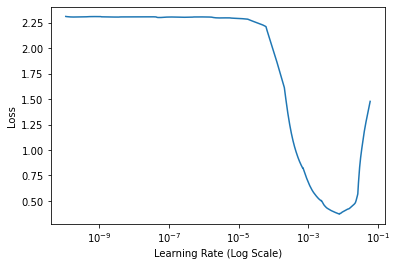

In [7]:
lrf = LearningRateFinder(standard_model)
lrf.find((x_train, y_train),1e-10, 1)
lrf.plot_loss()

# **Define hyperparameters**

In [11]:
BATCH_SIZE = 256
EPOCHS = 80
MIN_LR = 1e-4
MAX_LR = 1e-3

# Train a model without Learning Finder

In [10]:
model = get_training_model()
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
history = model.fit(x_train,
        y_train,
        batch_size=BATCH_SIZE,
        validation_data=(x_val, y_val),
        epochs=EPOCHS)

Epoch 1/80
14/14 [==============================] - 3s 200ms/step - loss: 2.0296 - accuracy: 0.2980 - val_loss: 1.3118 - val_accuracy: 0.7550
Epoch 2/80
14/14 [==============================] - 3s 180ms/step - loss: 1.1198 - accuracy: 0.6151 - val_loss: 0.4991 - val_accuracy: 0.8450
Epoch 3/80
14/14 [==============================] - 3s 178ms/step - loss: 0.7201 - accuracy: 0.7591 - val_loss: 0.3567 - val_accuracy: 0.8800
Epoch 4/80
14/14 [==============================] - 2s 178ms/step - loss: 0.6094 - accuracy: 0.7960 - val_loss: 0.3122 - val_accuracy: 0.9000
Epoch 5/80
14/14 [==============================] - 2s 178ms/step - loss: 0.5023 - accuracy: 0.8280 - val_loss: 0.2279 - val_accuracy: 0.9200
Epoch 6/80
14/14 [==============================] - 2s 178ms/step - loss: 0.4226 - accuracy: 0.8526 - val_loss: 0.1938 - val_accuracy: 0.9300
Epoch 7/80
14/14 [==============================] - 3s 180ms/step - loss: 0.3491 - accuracy: 0.8843 - val_loss: 0.1552 - val_accuracy: 0.9500
Epoch 

# Training Model With Learning Finder

In [47]:
def schedule(epoch, lr):
  MIN_LR = 1e-4
  MAX_LR = 1e-3
  steps_to_decay = 20
  if epoch % steps_to_decay == 0:
    if lr > MIN_LR: 
      return lr / (1 +(epoch // steps_to_decay) )
    else:
      return MIN_LR

  return lr

In [48]:
lr_schedular = keras.callbacks.LearningRateScheduler(schedule)

In [49]:
optimize_model = get_training_model()
optimize_model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
optimize_history = optimize_model.fit(x_train, y_train,
                    epochs=80,
                    batch_size=256,
                    validation_data = (x_val, y_val),
                    callbacks=[lr_schedular])

Epoch 1/80
14/14 [==============================] - 3s 198ms/step - loss: 2.0545 - accuracy: 0.3474 - val_loss: 1.3594 - val_accuracy: 0.6900 - lr: 0.0010
Epoch 2/80
14/14 [==============================] - 3s 186ms/step - loss: 1.1941 - accuracy: 0.6100 - val_loss: 0.5399 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 3/80
14/14 [==============================] - 3s 182ms/step - loss: 0.7866 - accuracy: 0.7397 - val_loss: 0.3407 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 4/80
14/14 [==============================] - 3s 183ms/step - loss: 0.5808 - accuracy: 0.8034 - val_loss: 0.2887 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 5/80
14/14 [==============================] - 3s 182ms/step - loss: 0.4753 - accuracy: 0.8446 - val_loss: 0.2031 - val_accuracy: 0.9350 - lr: 0.0010
Epoch 6/80
14/14 [==============================] - 3s 183ms/step - loss: 0.4028 - accuracy: 0.8697 - val_loss: 0.1783 - val_accuracy: 0.9650 - lr: 0.0010
Epoch 7/80
14/14 [==============================] - 3s 182ms/step - lo

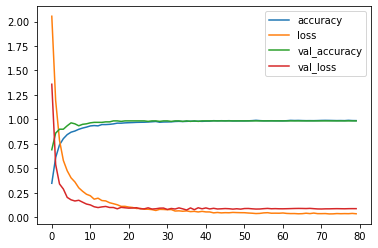

In [54]:
import pandas as pd
history_df = pd.DataFrame(optimize_history.history)
history_df.loc[:, history_df.columns.difference(['lr'])].plot()